In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.optimize import minimize_scalar

%matplotlib inline

def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

def weight_category(weight):
    if weight <120:
        result = 1
    elif weight >=150:
        result = 3
    else:
        result = 2
    
    return result
            

df = pd.read_csv('heights_weights.csv', index_col='Index')

df['BMI'] = df.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)

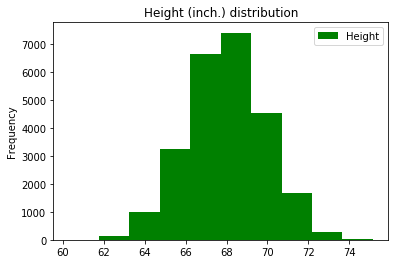

In [2]:
df.plot(y='Height', kind='hist', 
           color='green',  title='Height (inch.) distribution')

Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)

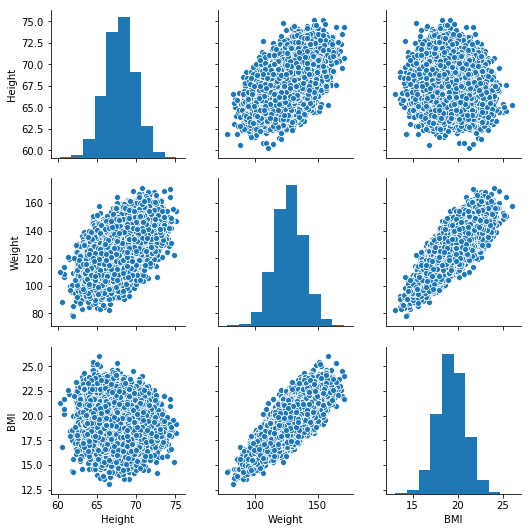

In [3]:
sns.pairplot(df)

Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения:
    1 – если вес меньше 120 фунтов. (~ 54 кг.), 
    3 - если вес больше или равен 150 фунтов (~68 кг.),
    2 – в остальных случаях. Постройте «ящик с усами» (boxplot),
    демонстрирующий зависимость роста от весовой категории.
    Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame.
    Подпишите ось y* меткой «Рост», ось *x – меткой «Весовая категория». Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)

[Text(0, 0.5, 'Рост'), Text(0.5, 0, 'Весовая категория')]

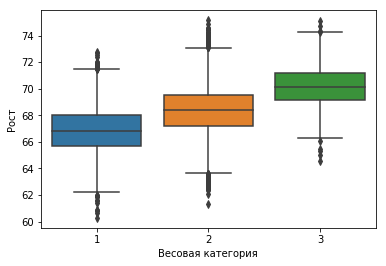

In [4]:
df['weight_cat'] = df['Weight'].apply(weight_category)
sns.boxplot(x = df['weight_cat'],y=df['Height'],).set(xlabel = 'Весовая категория',ylabel = 'Рост')

[5]. Постройте scatter plot зависимости роста от веса, используя метод plot для
Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

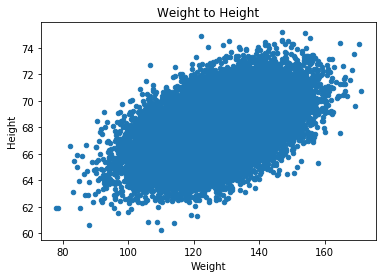

In [5]:
df.plot(x = 'Weight', y = 'Height',kind = 'scatter', title = 'Weight to Height')

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [59]:
def error(w0,w1,x,y):
    n = range(len(x))
    
    total_error = 0
    for row in n:
        cur_error = (y.iloc[row]-(w0+w1*x.iloc[row]))**2
        total_error+=cur_error
    return total_error




[7]. Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ( 𝑤0,𝑤1)=(60,0.05)
и ( 𝑤0,𝑤1)=(50,0.16) . Используйте метод plot из matplotlib.pyplot, а также метод linspace библиотеки NumPy. 
Подпишите оси и график.


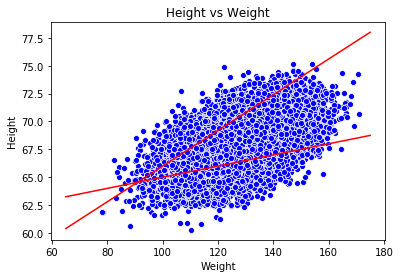

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(x = df['Weight'], y = df['Height'],  ax=ax, color='b').set_title('Height vs Weight')
x1 = np.linspace(65,175,200)
y1 = 60+x1*0.05

ax.plot(x1, y1, color='r')

x2 = np.linspace(65,175,200)
y2 = 50+x1*0.16

ax.plot(x2, y2, color='r')

[8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра  𝑤1  при  𝑤0  = 50. Подпишите оси и график.

[Text(0, 0.5, 'Error'),
 Text(0.5, 0, 'Slope'),
 Text(0.5, 1.0, 'Error function')]

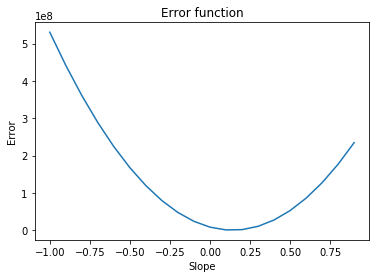

In [61]:

w0=50
w1_range = np.arange(-1, 1, 0.1)

y = [error(w0,w1,df['Weight'],df['Height']) for w1 in w1_range]
sns.lineplot(x=  w1_range,y=y).set(xlabel = 'Slope',ylabel = 'Error',title = 'Error function')


[9]. С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  𝑤1  в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ( 𝑤0 ,  𝑤1 ) = (50,  𝑤1_𝑜𝑝𝑡 ), где  𝑤1_𝑜𝑝𝑡  – найденное в п. 8 оптимальное значение параметра  𝑤1 .

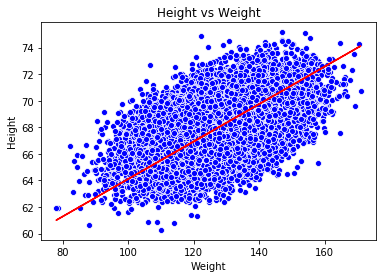

In [62]:
def error_w1(w1):
    
    x = df['Weight']
    y = df['Height']
    w0=50
    n = range(len(x))
    
    total_error = 0
    for row in n:
        cur_error = (y.iloc[row]-(w0+w1*x.iloc[row]))**2
        total_error+=cur_error
    return total_error

res=minimize_scalar(error_w1, bounds=(-5,5), method='bounded')

fig, ax = plt.subplots()
sns.scatterplot(x = df['Weight'], y = df['Height'],  ax=ax, color='b').set_title('Height vs Weight')
x1 = df['Weight']
y1 = 50+x*res.x

ax.plot(x1, y1, color='r')


[10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров  𝑤0  и  𝑤1 . Подпишите ось  𝑥  меткой «Intercept», ось  𝑦  – меткой «Slope», a ось  𝑧  – меткой «Error».

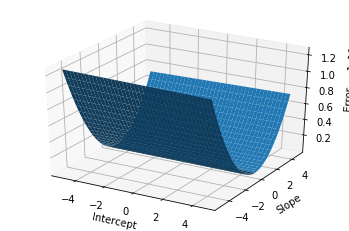

In [63]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
Z  = error(X,Y,df['Weight'],df['Height'])
#Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()



[11]. С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  𝑤0  в диапазоне [-100,100] и  𝑤1  - в диапазоне [-5, 5]. Начальная точка – ( 𝑤0 ,  𝑤1 ) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров  𝑤0  и  𝑤1 . Подпишите оси и график.

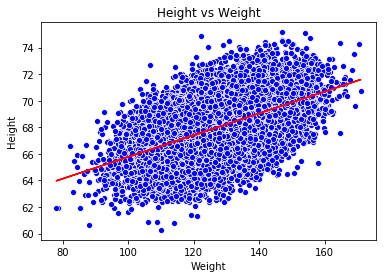

In [77]:
def error_w0_w1(ws):
    
    x = df['Weight']
    y = df['Height']
    
    n = range(len(x))
    
    total_error = 0
    for row in n:
        cur_error = (y.iloc[row]-(ws[0]+ws[1]*x.iloc[row]))**2
        total_error+=cur_error
    return total_error

res=scipy.optimize.minimize(error_w0_w1, (0,0),  bounds=((-100,100),(-5, 5)),method = 'L-BFGS-B')

fig, ax = plt.subplots()
sns.scatterplot(x = df['Weight'], y = df['Height'],  ax=ax, color='b').set_title('Height vs Weight')
x1 = df['Weight']
y1 = res.x[0]+x*res.x[1]

ax.plot(x1, y1, color='r')

array([57.57171454,  0.08200697])